# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 1384 Прошичев Александр, Шушков Егор и Найдёнова Елена. Вариант №10.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

1) Дискретный единичный скачок $ \sigma_d(k) $ будем определять, как

$ \sigma_d(k) = \begin{cases} 1, & \quad k \geq 0; \\ 0, & \quad k < 0; \end{cases} $

2) Смещение дискретного единичного скачка $ \sigma_d(k) $ на $ t_0 $ вправо задаём, как

$ \sigma_d(k - t_0) = \begin{cases} 1, & \quad k \geq t_0; \\ 0, & \quad k < t_0; \end{cases} $

3) Линейной комбинацией набора сигналов $ x_1(k), x_2(k), ..., x_{n}(k) $ будем называть такой выходной сигнал $ s(k) $, что

$ s(k) = \sum_{i = 1}^{n} a_i x_i(k)$, где $a_i$ - вес сигнала $ x_i(k) $, характеризующий его вклад в итоговый сигнал $ s(k) $

4) Связь частоты $ \hat{\omega} $ и периода $ T $ гармонического сигнала

$ \hat{\omega} = \cfrac{2 \pi}{T} \Leftrightarrow T = \cfrac{2 \pi}{\hat{\omega}}$

5) Связь наибольшего общего делителя $ GCD(z_1, z_2) $ и наименьшего общего кратного $ LCM(z_1, z_2) $

$ LCM(z_1, z_2) = \cfrac{|z_1 \cdot z_2|}{GCD(z_1, z_2)} $

6) Среднее значение сигнала $ \overline{s(k)} $ определяется, как

$ \overline{s(k)} = \frac{1}{T} \sum_{k = 0}^{T - 1} s(k) $, где $ T $ - период дискретного сигнала $ s(k) $

7) Энергия сигнала $ E[ s(k) ] $ определяется, как

$ E[ s(k) ] =  \sum_{k = 0}^{T - 1} s^2(k) $, где $ T $ - период дискретного сигнала $ s(k) $

8) Средняя мощность $ P[s(k)] $ определяется, как

$ P[ s(k) ] = \frac{1}{T} \sum_{k = 0}^{T - 1} s^2(k) $, где $ T $ - период дискретного сигнала $ s(k) $

9) Дискретный сигнал $ \widehat{s(k)} $ с экспоненциальной огибающей определяется, как

$ \widehat{s(k)} = s(k) \cdot |a|^k $



## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Подключим требуемые модули и выпишем константы для выполнения лабораторной работы.

In [91]:
import math
import numpy as np
import matplotlib.pyplot as plt

"""Константы"""
Nb = 10 #Номер бригады
N = 30 + Nb % 5 #Длина последовательности
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20)) #Основание экспоненты
C = 1 + Nb % 5 #Амплитуда гармонического сигнала
w0 = math.pi / (6 + Nb % 5) #Частота гармонического сигнала
U = Nb % 20 + 1 #Амплитуда импульса
n0 = 3 + Nb % 5 #Начальный момент импульса
n_imp = 5 + Nb % 5 #Длина импульса

#Амплитуды гармонических сигналов
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5

#Частоты гармонических сигналов
w1 = math.pi / (4 + Nb % 5)
w2 = math.pi / (8 + Nb % 5)
w3 = math.pi / (16 + Nb % 5)

#Коэффициенты линейной комбинации гармонических сигналов
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

### Задание 1

Смоделировать дискретный прямоугольный импульс:

$ s_1(k) = \begin{cases} U, & \quad n_0 \leq k \leq n_0 + n_{imp} - 1; \\ 0, & \quad \text{else}; \end{cases} $ \
на основе дискретного единичного скачка $\sigma_d(k)$ с выводом графика на интервале времени $n \in [0, N - 1]$. Пояснить, как выполняется моделирование импульса.



---



Дискретный единичный скачок $\sigma_k(d) $ определяется, как

$ \sigma_d(k) = \begin{cases} 1, & \quad k \geq 0; \\ 0, & \quad k < 0; \end{cases}$.

Для получения дискретного прямоугольного импульса $s_1(k)$ на основе дискретного единичного скачка $ \sigma_d(k) $ можно воспользоваться смещением и масштабированием нескольких дискретных единичных скачков $ \sigma_d(k) $, тогда

 $s_1(k) = U \, \sigma_d(k - n_0) - U \, \sigma_d(k - n_0 - n_{imp}) $

In [92]:
""" Дискретный единичный скачок """
def Sigma_d(k):
  if k >= 0:
    return 1
  return 0

""" Дискретный прямоугольный импульс """
def S_1(k):
  return U * Sigma_d(k - n0) - U * Sigma_d(k - n0 - n_imp)

#адаптация функции под обработку np.array
S_1 = np.frompyfunc(S_1, 1, 1)

n = np.arange(0, N)
s_1 = S_1(n)

Построим график полученного импульса

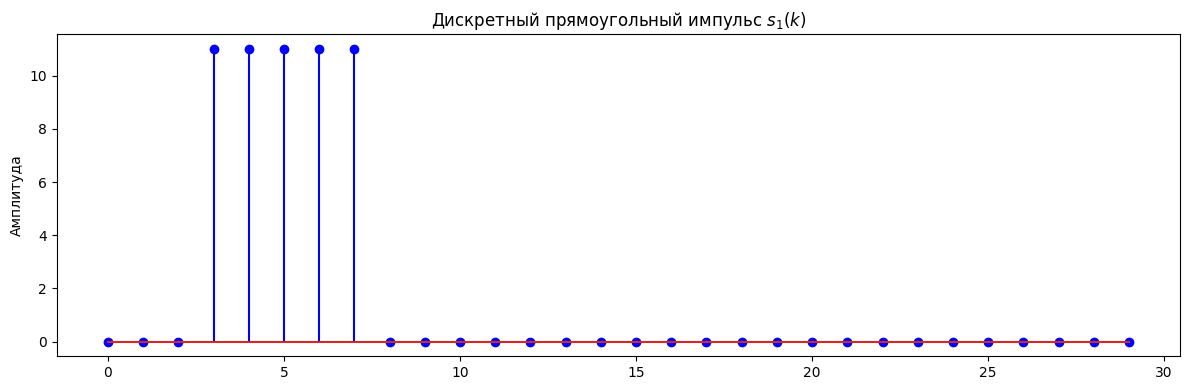

In [93]:
plt.figure(figsize=(12, 4))
plt.stem(n, s_1, linefmt="b-", markerfmt="bo")
plt.title('Дискретный прямоугольный импульс $ s_1(k) $')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

### Задание 2

Смоделировать линейную комбинацию дискретных гармонических сигналов $ s_2(k) $:

$ s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k) $,

где


$ x_i(k) = B_i \sin(\hat{\omega_i}k), \quad i = 1,2,3 $

с выводом графиков последовательностей $ x_i(k) $ и $
s_2(k) $ на интервале времени $ n \in [0, 5N - 1] $. Вычислить среднее значение, энергию и среднюю мощность последовательности $ s_2(k) $.

Пояснить:

а. Операции при моделировании линейной комбинации сигналов $ s_2(k) $;

b. Как определяют указанные характеристики.


---



Для получения линейной комбинации сигналов $ s_2(k) $ требуется посчитать гармонические сигналы $ x_i(k) $, задаваемые амплитудами $ B_1, B_2, B_3 $ и частотами $ \hat{\omega_1}, \hat{\omega_2}, \hat{\omega_3} $ соответственно. Следующим шагом каждый сигнал $ x_i(k) $ взвешивается коэффициентом $ a_i $. Вес $ a_i $ показывает, насколько сильно и каким образом сигнал $ x_i(k) $ будет влиять на итоговый $ s_2(k) $. В заключении происходит поточечное сложение сигналов. Итоговый сигнал может усиливаться или ослабляться в определённых точках в зависимости от частот исходных $ x_i(k) $ и знака весов $ a_i $.

In [94]:
""" Дискретные гармонические сигналы x_i(k) """
def X_i(k, i):
  match i:
    case 1:
      return B1 * np.sin(w1 * k)
    case 2:
      return B2 * np.sin(w2 * k)
    case 3:
      return B3 * np.sin(w3 * k)

""" Линейная комбинация дискретных гармонических сигналов s_2(k) """
def S_2(k):
  return a1 * X_i(k, 1) + a2 * X_i(k, 2) + a3 * X_i(k, 3)

S_2 = np.frompyfunc(S_2, 1, 1)

n = np.arange(0, 5 * N)
x_1 = X_i(n, 1)
x_2 = X_i(n, 2)
x_3 = X_i(n, 3)
s_2 = S_2(n)

Построим графики сигналов $ x_i(k) $ и $ s_2(k) $

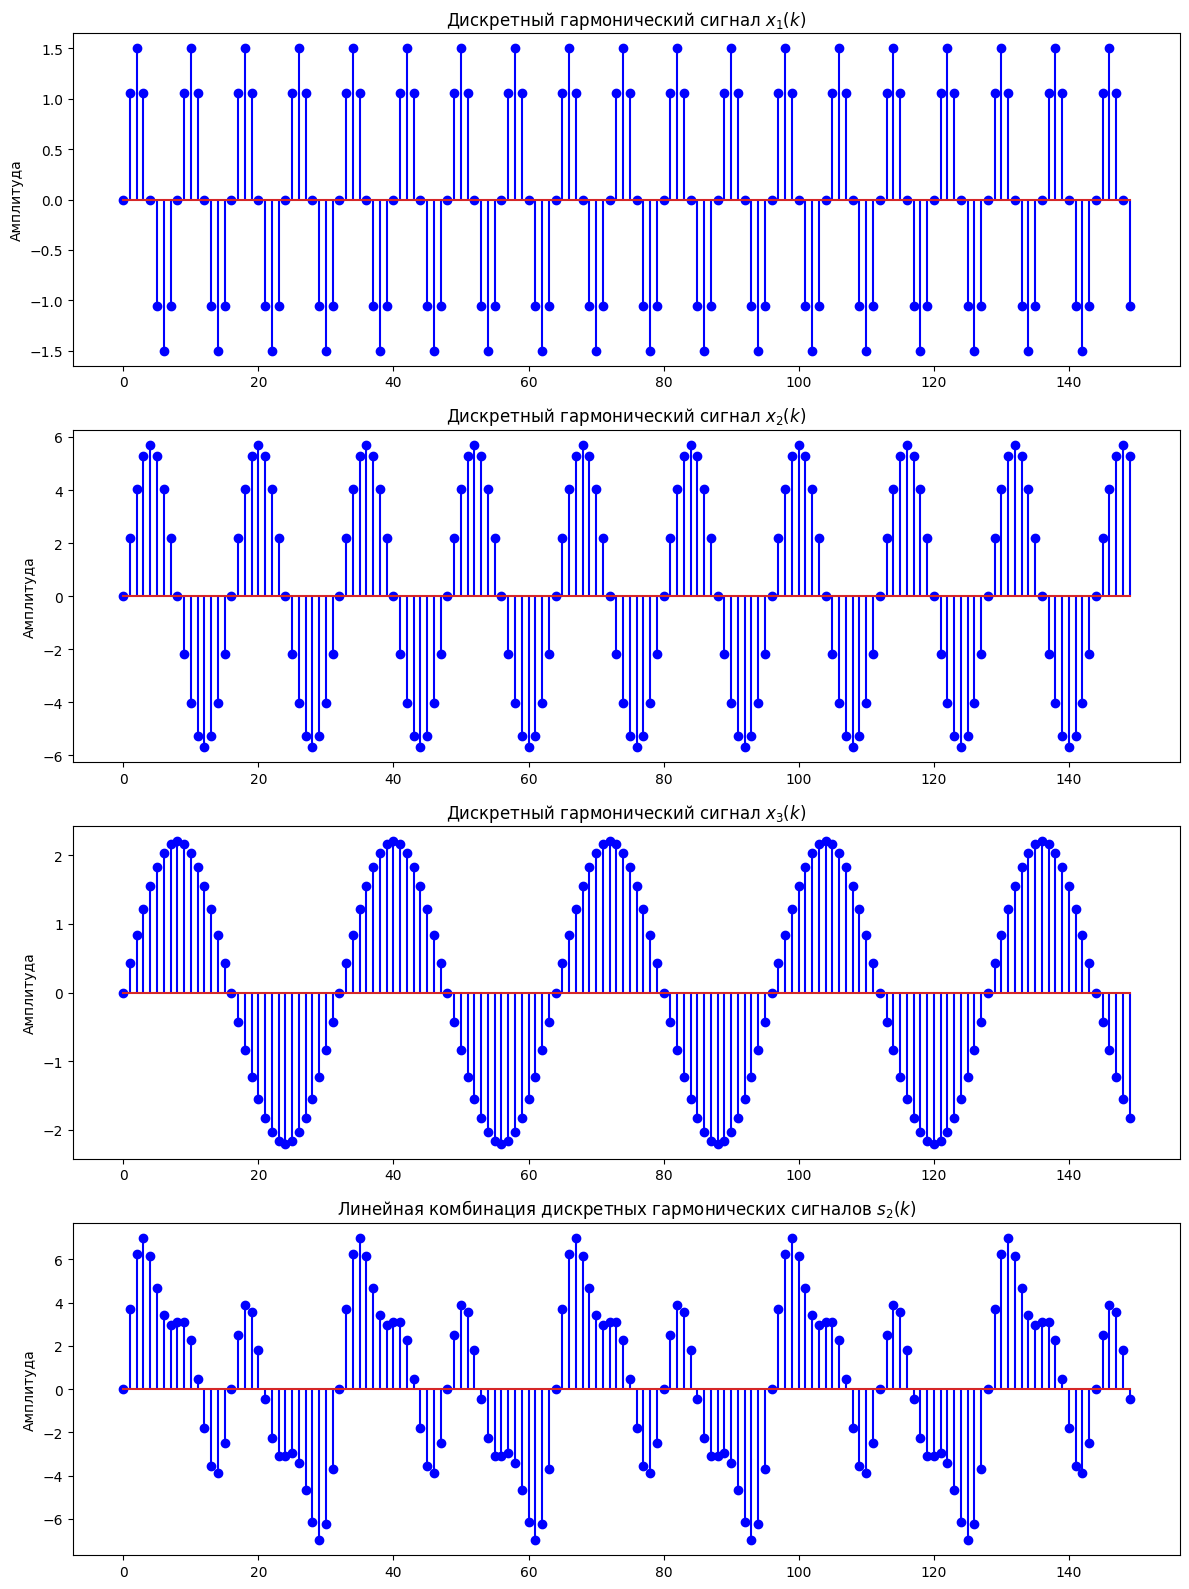

In [95]:
plt.figure(figsize=(12, 16))
plt.subplot(4, 1, 1)
plt.stem(n, x_1, linefmt="b-", markerfmt="bo")
plt.title('Дискретный гармонический сигнал $ x_1(k) $')
plt.ylabel('Амплитуда')

plt.subplot(4, 1, 2)
plt.stem(n, x_2, linefmt="b-", markerfmt="bo")
plt.title('Дискретный гармонический сигнал $ x_2(k) $')
plt.ylabel('Амплитуда')

plt.subplot(4, 1, 3)
plt.stem(n, x_3, linefmt="b-", markerfmt="bo")
plt.title('Дискретный гармонический сигнал $ x_3(k) $')
plt.ylabel('Амплитуда')

plt.subplot(4, 1, 4)
plt.stem(n, s_2, linefmt="b-", markerfmt="bo")
plt.title('Линейная комбинация дискретных гармонических сигналов $ s_2(k) $')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

Для расчёта численных характеристик требуется расчитать период итогового сигнала $ T $. Так как происходит линейная комбинация дискретных гармонических сигналов со своими периодами $ T_1, T_2, T_3 $, то период $T$ можно представить, как

$ T = LSM(T_1, T_2, T_3), \quad $ где $LSM(z_1, z_2)$ - наименьшее общее кратное $z_1, z_2 \in \mathbb{Z}$

Для получения наименьшего общего кратного $ LSM(z_1, z_2) $ воспользуемся формулой

$ LSM(z_1, z_2) = \cfrac{|z_1 \cdot z_2|}{GCD(z_1, z_2)} $

Для получения периодов $ T_1, T_2, T_3 $ воспользуемся формулой связи частот и периодов гармонических сигналов

$ T_i = \cfrac{2 \pi}{\hat{\omega_i}} $



In [96]:
T_1 = 2 * math.pi / w1
T_2 = 2 * math.pi / w2
T_3 = 2 * math.pi / w3

T_12 = (T_1 * T_2) // math.gcd(int(T_1), int(T_2)) #НОК для первых двух периодов
T = int((T_12 * T_3) // math.gcd(int(T_12), int(T_3)))
f"LSM(T_1, T_2, T_3): {T}" #НОК для НОКА первых двух периодов и третьего периода

'LSM(T_1, T_2, T_3): 32'

In [97]:
T = np.arange(0, T) #Строим один период сигнала
s_2 = S_2(T)

Теперь посчитаем характеристики полученной последовательности $ s_2(k) $ такие, как:

1) Среднее значение $\overline{s_2(k)} = \frac{1}{T} \sum_{k = 0}^{T - 1}{s_2(k)}$

In [98]:
f's2 mean: {np.mean(s_2)}'

's2 mean: -5.134781488891349e-16'

2) Энергию $ E[s_2(k)] = \sum_{k = 0}^{T - 1}s^2_2(k)$

In [99]:
f's2 energy: {np.sum(s_2 ** 2)}'

's2 energy: 487.50400000000013'

3) Среднюю мощность $ P[s_2(k)] = \frac{1}{T}\sum_{k = 0}^{T - 1}s^2_2(k)$

In [100]:
f's2 average power: {np.mean(s_2 ** 2)}'

's2 average power: 15.234500000000004'

### Задание 3

Вывести график дискретного сигнала $ s_3(k) $, представляющего собой дискретный гармонический сигнал $ s(k) $

$ s(k) = C \cos(\hat{\omega_0} k) $

с экспоненциальной огибающей $ |a|^k $, на интервале времени $ n \in [0, N - 1] $.

Привести аналитическую формулу дискретного сигнала $ s_3(k) $ и пояснить операции при его моделировании.


---



Для получения дискретного сигнала с экспоненциальной огибающей $ |a|^k $ требуется умножить $ s(k) $ и $ |a|^k $. Так как $s(k)$ является гармоническим сигналом, его амплитуда колеблится в диапазоне $ [-C, C] $. При домножении на $ |a|^k $ диапазон станет $ [-C \, |a|^k, C \, |a|^k] $, то есть будет экспоненциально модулироваться.

$ s_3(k) = s(k) \cdot |a|^k $

In [101]:
""" Дискретный гармонический сигнал s(k) """
def S(k):
  return C * np.cos(w0 * k)

""" Экспоненциальная огибающая |a|^k """
def Exp(k):
  return np.abs(a) ** k

""" Дискретный сигнал s_3(k) """
def S_3(k):
  return S(k) * Exp(k)

n = np.arange(0, N)
s_3 = S_3(n)
exp_3 = Exp(n)

Построим график дискретного сигнала $ s_3(k) $ и покажем, что $ |a|^k $ действительно является его огибающей

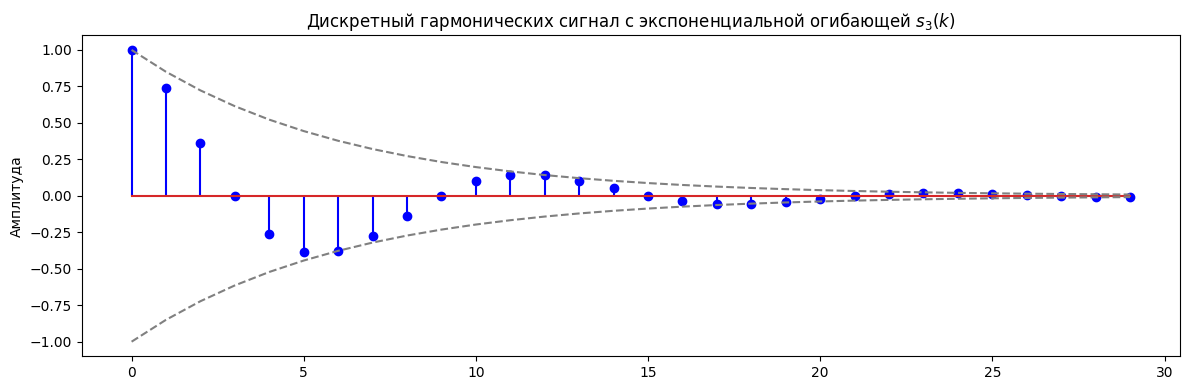

In [102]:
plt.figure(figsize=(12, 4))
plt.stem(n, s_3, linefmt="b-", markerfmt="bo")
plt.plot(n, exp_3, color = "grey", linestyle='dashed')
plt.plot(n, -exp_3, color = "grey", linestyle='dashed')
plt.title('Дискретный гармонических сигнал с экспоненциальной огибающей $ s_3(k) $')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

### Задание 4

Вывести график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса.

Пояснить операции при моделировании периодической последовательности.


---



Для построения периодической последовательности $ s_4(k) $ прямоугольных импульсов построим линейную комбинацию дискретных единичных скачков $ \sigma_d(k) $, как это было реализовано в задании 1. Так как период должен быть вдвое больше длительности импульса, смещение каждого последующего импульса относительно предыдущего должно быть равно $ n_{imp} $.

$ s_4(k) = \sum_{s = 0}^{4} U \, \sigma_d(k - 2s \, n_{imp}) - U \, \sigma_d(k - (2s + 1)n_{imp}) $,

где

$ 2s \, n_{imp} $ - момент начала $s + 1$ импульса

$ (2s + 1) n_{imp} $ - момент конца $s + 1$ импульса

In [103]:
""" Дискретный единичный скачок """
def Sigma_d(k):
  if k >= 0:
    return 1
  return 0

""" Дискретный прямоугольный импульс """
def S_4(k):
  sm = 0

  for s in range(5):
    sm += U * Sigma_d(k - 2 * s * n_imp) - U * Sigma_d(k - (2 * s + 1) * n_imp)

  return sm


#адаптация функции под обработку np.array
S_4 = np.frompyfunc(S_4, 1, 1)

n = np.arange(0, 10 * n_imp)
s_4 = S_4(n)

Построим график периодической последовательности $ s_4(k) $

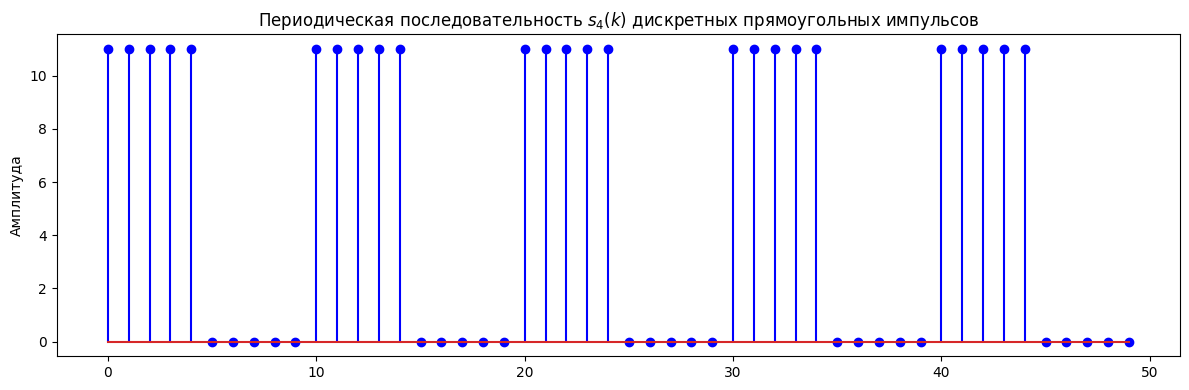

In [104]:
plt.figure(figsize=(12, 4))
plt.stem(n, s_4, linefmt="b-", markerfmt="bo")
plt.title('Периодическая последовательность $ s_4(k) $ дискретных прямоугольных импульсов')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

## Выводы

В ходе лабораторной работы были изучены способы математического описания линейных комбинаций дискретных гармонических сигналов и были освоены программные средства их моделирования.

Линейная комбинация позволяет описывать более сложные сигналы с помощью операций сложения и произведения над более простыми. Так, было изучено, что дискретный прямоугольный импульс или периодическая последовательность таких импульсов могут быть описаны линейной комбинацией дискретных единичных скачков $ \sigma_d(k) $.

Была рассмотрена линейная комбинация нескольких гармонических сигналов $ B_i \sin (\hat{\omega_i} k) $, что позволило исследовать их взаимодействия в линейной комбинации при различных параметрах сигналов.

Были посчитаны численные характеристики сигналов такие, как среднее значение, энергия и средняя мощность, позволяющие изучать сигналы и сравнивать их между собой.

Был смоделирован дискретный сигнал с экспоненциальной огибающей. Так, получилось ознакомиться с модуляцией амплитуды сигналов экспоненциальными функциями.

Таким образом, были получены навыки моделирования и анализа различных дискретных сигналов, являющихся линейными комбинациями более простых .

